In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
np.random.seed(42)

In [26]:
apartments=[f"Apt_{i}" for i in range(1,21)] 

In [27]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [28]:
    data={
        "date":np.tile(dates,len(apartments)),
        "Apartment":np.repeat(apartments,len(dates)),
        "Electicity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
    }
        

In [29]:
df=pd.DataFrame(data)

In [30]:
df["Electicity_usage"]=df["Electicity_usage"].round(2)

In [31]:
print(df.isnull().sum())

date                0
Apartment           0
Electicity_usage    0
dtype: int64


In [32]:
print(df.describe())

                      date  Electicity_usage
count                  600        600.000000
mean   2025-07-15 12:00:00         20.336233
min    2025-07-01 00:00:00          5.390000
25%    2025-07-08 00:00:00         16.947500
50%    2025-07-15 12:00:00         20.210000
75%    2025-07-23 00:00:00         23.560000
max    2025-07-30 00:00:00         35.970000
std                    NaN          4.953919


In [33]:
print(df.dtypes)

date                datetime64[ns]
Apartment                   object
Electicity_usage           float64
dtype: object


In [34]:
usage_per_apartment = df.groupby("Apartment")["Electicity_usage"].sum().sort_values(ascending=False)


In [45]:
daily_avg = df.groupby("date")["Electicity_usage"].mean()
print(daily_avg.head())

date
2025-07-01    21.3085
2025-07-02    18.6025
2025-07-03    19.6760
2025-07-04    21.9270
2025-07-05    18.8155
Name: Electicity_usage, dtype: float64


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

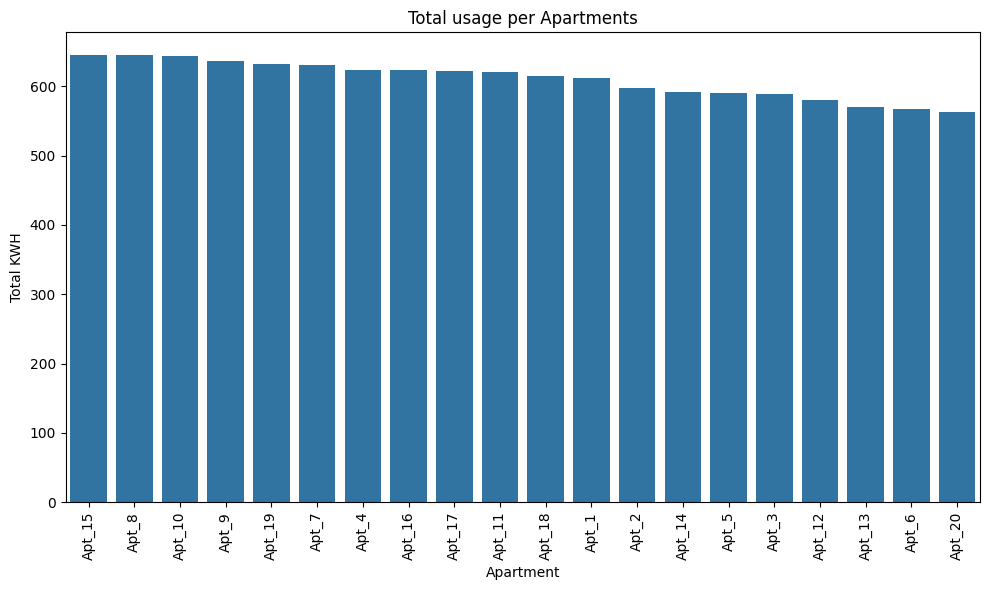

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y= usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()

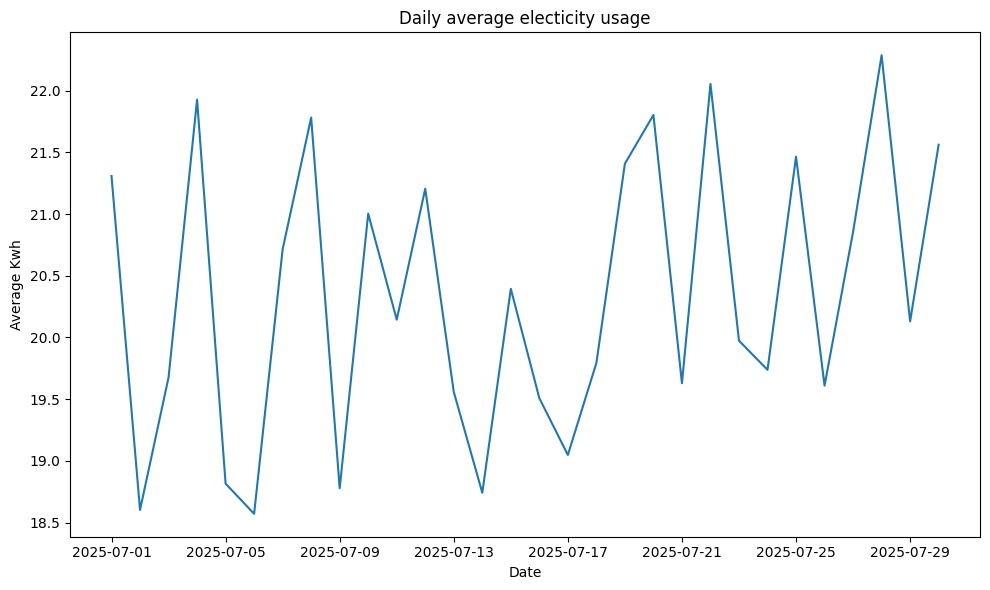

In [49]:
 plt.figure(figsize=(10,6))
 sns.lineplot(x=daily_avg.index, y=daily_avg.values)
 plt.title("Daily average electicity usage")
 plt.xlabel("Date")
 plt.ylabel("Average Kwh")
 plt.tight_layout()
 plt.show()

In [53]:
threshold= df["Electicity_usage"].mean()+2 *df["Electicity_usage"].std()
df["High_Usage_flag"]=df["Electicity_usage"] > threshold
print(df[df["High_Usage_flag"]== True].head())

         date Apartment  Electicity_usage  High_Usage_flag
19 2025-07-20     Apt_1             30.73             True
29 2025-07-30     Apt_1             31.05             True
33 2025-07-04     Apt_2             32.90             True
76 2025-07-17     Apt_3             31.60             True
91 2025-07-02     Apt_4             32.46             True
